# Chapter 9

Chapter 9 is mostly about installing Tensorflow so some of it is not relevant.  
There are a couple of exercises in model fitting though and we can replicate them.
First we show how to use Pytorch for matrix algebra and compare the solution of a least squares problem to that from numpy.

In [1]:
import torch
import numpy as np
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1), dtype=housing.data.dtype), housing.data]

In [3]:
X = torch.from_numpy(housing_data_plus_bias)
y = torch.from_numpy(housing.target.reshape(-1, 1))
Xt = torch.transpose(X, 0, 1)
theta = torch.matmul(torch.matmul(torch.inverse(torch.matmul(Xt, X)), Xt), y)

In [4]:
theta_np = np.linalg.inv(housing_data_plus_bias.T@housing_data_plus_bias)@(housing_data_plus_bias.T@housing.target.reshape(-1, 1))

In [5]:
print(torch.linalg.norm(torch.from_numpy(theta_np) - theta))

tensor(1.2321e-11, dtype=torch.float64)


## Gradient Descent -- Linear Regression
Remeber to scale the feature vectors.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaled_housing_data_plus_bias = StandardScaler().fit_transform(housing_data_plus_bias)

In [8]:

theta_gd = (torch.rand(n+1, 1, requires_grad=True) * 2. - 1.).float() # n+1 is for bias 
y_gd_pred = torch.matmul(X.float(), theta_gd)
error_gd = y_gd_pred - y
mse = torch.mean(error_gd**2)
grads_manual = 2/m * torch.matmul(Xt, error_gd)
grads_auto = torch.autograd.grad(mse, theta_gd)[0]
print(torch.linalg.norm(grads_manual - grads_auto)**2)

tensor(0.0029, dtype=torch.float64, grad_fn=<PowBackward0>)


In [9]:
y.dtype

torch.float64

In [10]:
n_epochs = 7500
learning_rate = 0.01
X_gd = torch.from_numpy(scaled_housing_data_plus_bias).float()
y_gd = torch.from_numpy(housing.target.reshape(-1, 1)).float()
theta_gd = (torch.rand(n+1, 1, requires_grad=True) * 2. - 1.).float() # n+1 is for bias 
y_pred_gd = torch.matmul(X_gd, theta_gd)
error_gd = y_pred_gd - y_gd
mse = torch.mean(error_gd**2)
grads_auto = torch.autograd.grad(mse, theta_gd)[0]
grads_manual = 2/m * torch.matmul(X_gd.T, error_gd)


for epoch in range(n_epochs):
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, MSE: {mse:.4f}, ||grad||: {torch.linalg.norm(grads_auto):.4e}")
    y_pred_gd = torch.matmul(X_gd, theta_gd)
    error_gd = y_pred_gd - y_gd
    mse = torch.mean(error_gd**2)
    grads_auto = torch.autograd.grad(mse, theta_gd)[0]
    theta_gd = theta_gd - learning_rate * grads_auto
    
    with torch.no_grad():
        theta_gd.sub_(learning_rate * grads_auto)


Epoch 0, MSE: 11.4104, ||grad||: 6.0484e+00
Epoch 500, MSE: 4.8140, ||grad||: 5.8481e-02
Epoch 1000, MSE: 4.8037, ||grad||: 1.1990e-02
Epoch 1500, MSE: 4.8033, ||grad||: 2.7708e-03
Epoch 2000, MSE: 4.8033, ||grad||: 8.0514e-04
Epoch 2500, MSE: 4.8033, ||grad||: 2.8650e-04
Epoch 3000, MSE: 4.8033, ||grad||: 1.1211e-04
Epoch 3500, MSE: 4.8033, ||grad||: 4.5577e-05
Epoch 4000, MSE: 4.8033, ||grad||: 1.8933e-05
Epoch 4500, MSE: 4.8033, ||grad||: 8.2740e-06
Epoch 5000, MSE: 4.8033, ||grad||: 5.3622e-06
Epoch 5500, MSE: 4.8033, ||grad||: 5.3622e-06
Epoch 6000, MSE: 4.8033, ||grad||: 5.3622e-06
Epoch 6500, MSE: 4.8033, ||grad||: 5.3622e-06
Epoch 7000, MSE: 4.8033, ||grad||: 5.3622e-06


In [11]:
theta_gd

tensor([[ 0.4529],
        [ 0.8296],
        [ 0.1188],
        [-0.2656],
        [ 0.3057],
        [-0.0045],
        [-0.0393],
        [-0.8999],
        [-0.8705]], grad_fn=<SubBackward0>)

In [12]:
n_epochs = 7500
learning_rate = 0.01

X_scaled = X_gd.numpy()
y_scaled = y_gd.numpy()
theta_gd_np = np.random.uniform(low=-1., high=1., size=(X_scaled.shape[1])).reshape(-1, 1)
y_pred_gd_np = X_scaled@theta_gd_np #torch.matmul(X_gd, theta_gd)
error_np = y_pred_gd_np - y_scaled
mse = np.mean(error_np**2)
grads_manual = 2/m * X_scaled.T@error_np
# grads_auto = torch.autograd.grad(mse, theta_gd)[0]
# grads_manual = 2/m * torch.matmul(X_gd.T, error_gd)


for epoch in range(n_epochs):
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, MSE: {mse:.4f}, ||grad||: {torch.linalg.norm(grads_auto):.4e}")
    y_pred_gd_np = X_scaled@theta_gd_np# torch.matmul(X_gd, theta_gd)
    error_np = y_pred_gd_np - y_scaled
    mse = np.mean(error_np**2)
    grads_manual = 2/m * X_scaled.T@error_np
    theta_gd_np = theta_gd_np - learning_rate * grads_manual


Epoch 0, MSE: 5.9513, ||grad||: 5.3622e-06
Epoch 500, MSE: 4.8768, ||grad||: 5.3622e-06
Epoch 1000, MSE: 4.8235, ||grad||: 5.3622e-06
Epoch 1500, MSE: 4.8096, ||grad||: 5.3622e-06
Epoch 2000, MSE: 4.8054, ||grad||: 5.3622e-06
Epoch 2500, MSE: 4.8041, ||grad||: 5.3622e-06
Epoch 3000, MSE: 4.8036, ||grad||: 5.3622e-06
Epoch 3500, MSE: 4.8034, ||grad||: 5.3622e-06
Epoch 4000, MSE: 4.8033, ||grad||: 5.3622e-06
Epoch 4500, MSE: 4.8033, ||grad||: 5.3622e-06
Epoch 5000, MSE: 4.8033, ||grad||: 5.3622e-06
Epoch 5500, MSE: 4.8033, ||grad||: 5.3622e-06
Epoch 6000, MSE: 4.8033, ||grad||: 5.3622e-06
Epoch 6500, MSE: 4.8033, ||grad||: 5.3622e-06
Epoch 7000, MSE: 4.8033, ||grad||: 5.3622e-06


## Gradient Descent -- Logistic Regression

In [13]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

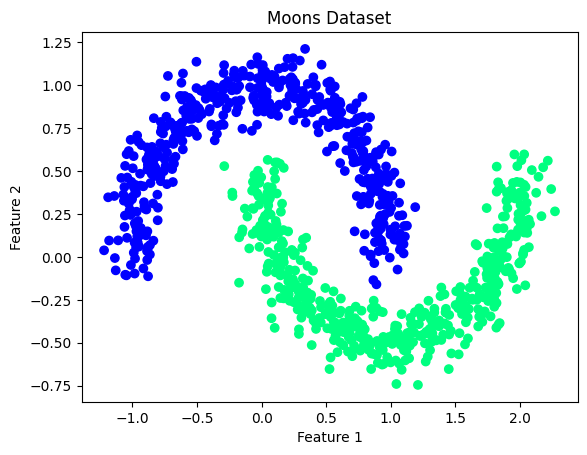

In [14]:
# Generate the moons dataset
np.random.seed(12351)
n = 1000
X, y = make_moons(n_samples=n, noise=0.1, random_state=42)
d = X.shape[1]

# Plot the dataset
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.winter)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Moons Dataset')
plt.show()

In [15]:
test_ratio = 0.2
test_size = int(n * test_ratio)

# X_moons_with_bias = np.c_[np.ones((n, 1)), X]
y_moons_column = y.reshape(-1, 1)

# X_train = torch.from_numpy(X_moons_with_bias[:-test_size]).float()
# X_test = torch.from_numpy(X_moons_with_bias[-test_size:]).float()
X_train = torch.from_numpy(X[:-test_size]).float()
X_test = torch.from_numpy(X[-test_size:]).float()
y_train = torch.from_numpy(y_moons_column[:-test_size]).float()
y_test = torch.from_numpy(y_moons_column[-test_size:]).float()

scaler = StandardScaler()
X_train_scaled = torch.from_numpy(scaler.fit_transform(X_train)).float()
X_test_scaled = torch.from_numpy(scaler.transform(X_test)).float()
print(X_train_scaled.shape)

torch.Size([800, 2])


In [16]:
print(n, d)

1000 2


In [17]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(d)

In [18]:
learning_rate = 0.01
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [19]:
num_epochs = 1000

for epoch in range(num_epochs):
    y_predicted = model(X_train_scaled)
    loss = criterion(y_predicted, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss: {loss.item():.5f}')

Epoch 0, loss: 0.61082
Epoch 100, loss: 0.49862
Epoch 200, loss: 0.43293
Epoch 300, loss: 0.39126
Epoch 400, loss: 0.36295
Epoch 500, loss: 0.34266
Epoch 600, loss: 0.32750
Epoch 700, loss: 0.31578
Epoch 800, loss: 0.30648
Epoch 900, loss: 0.29895


In [20]:
# evaluate model
with torch.no_grad():
    y_predicted = model(X_test)  # no need to call model.forward()
    y_predicted_cls = y_predicted.round()   # round off to nearest class
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])  # accuracy
    print(f'accuracy = {acc:.4f}')

accuracy = 0.8100


In [21]:
X_test.shape

torch.Size([200, 2])

In [22]:
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Convert grid points to PyTorch tensor
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)
with torch.no_grad():
    probs = model(grid_tensor)
probs

tensor([[0.6520],
        [0.6616],
        [0.6711],
        ...,
        [0.3217],
        [0.3310],
        [0.3405]])

In [23]:
grid_tensor, xx, yy

(tensor([[-2.0000, -2.0000],
         [-1.9596, -2.0000],
         [-1.9192, -2.0000],
         ...,
         [ 1.9192,  2.0000],
         [ 1.9596,  2.0000],
         [ 2.0000,  2.0000]]),
 array([[-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
          1.95959596,  2.        ],
        [-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
          1.95959596,  2.        ],
        [-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
          1.95959596,  2.        ],
        ...,
        [-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
          1.95959596,  2.        ],
        [-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
          1.95959596,  2.        ],
        [-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
          1.95959596,  2.        ]]),
 array([[-2.        , -2.        , -2.        , ..., -2.        ,
         -2.        , -2.        ],
        [-1.95959596, -1.95959596, -1.95959596, ..., -1.95959596,
         -1.959

In [24]:
probs_np = probs.numpy().reshape(xx.shape)

/var/folders/ts/39plpy691lg3xd9rvzndrmt40000gq/T/ipykernel_36569/3791059611.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Accuracy: {:.4f}".format(acc))


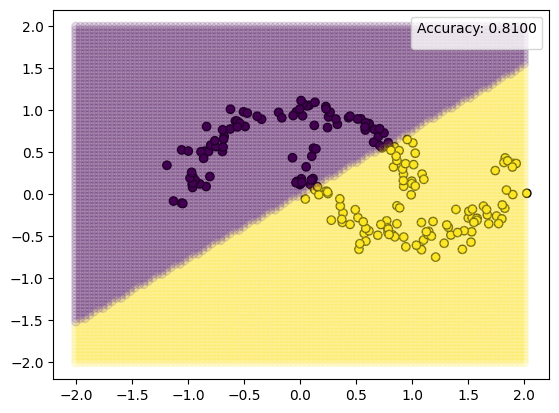

In [25]:
y_pred_class = y_predicted_cls.numpy()
fig, ax = plt.subplots()
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_class, edgecolors="black")
ax.scatter(xx, yy, c=probs_np.round(), alpha=0.125)
ax.plot()
ax.legend(title="Accuracy: {:.4f}".format(acc))
plt.show()

The solution is not great because the model is linear.  This could be improved with some additional (e.g. polynomial) features.

In [26]:
X_train_enhanced = torch.from_numpy(np.c_[X_train,
                        np.square(X_train[:, 0]),
                        np.square(X_train[:, 1]),
                        X_train[:, 0] ** 3,
                        X_train[:, 1] ** 3]).float()
X_test_enhanced = torch.from_numpy(np.c_[X_test,
                    np.square(X_test[:, 0]),
                    np.square(X_test[:, 1]),
                    X_test[:, 0] ** 3,
                    X_test[:, 1] ** 3]).float()

/var/folders/ts/39plpy691lg3xd9rvzndrmt40000gq/T/ipykernel_36569/3220766393.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  np.square(X_train[:, 0]),
/var/folders/ts/39plpy691lg3xd9rvzndrmt40000gq/T/ipykernel_36569/3220766393.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  np.square(X_train[:, 1]),
/var/folders/ts/39plpy691lg3xd9rvzndrmt40000gq/T/ipykernel_36569/3220766393.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  np.square(X_test[:, 0]),
/var/folders/ts/39plpy691lg3xd9rvzndrmt40000gq/T/ipykernel_36569/3220766393.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  np.square(X_test[:, 1]),


In [27]:
X_train_enhanced.shape

torch.Size([800, 6])

In [65]:
model_enh = LogisticRegression(X_train_enhanced.shape[1])
num_epochs = 50000
enh_optimizer =  torch.optim.SGD(model_enh.parameters(), lr=1e-2)
enh_criterion = torch.nn.BCELoss()
learning_rate = 0.01


for epoch in range(num_epochs):
    y_predicted_enh = model_enh(X_train_enhanced)
    loss = enh_criterion(y_predicted_enh, y_train)
    loss.backward()
    enh_optimizer.step()
    enh_optimizer.zero_grad()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss: {loss.item():.5f}')

Epoch 0, loss: 0.70254
Epoch 100, loss: 0.45363
Epoch 200, loss: 0.41601
Epoch 300, loss: 0.39367
Epoch 400, loss: 0.37712
Epoch 500, loss: 0.36377
Epoch 600, loss: 0.35251
Epoch 700, loss: 0.34272
Epoch 800, loss: 0.33403
Epoch 900, loss: 0.32619
Epoch 1000, loss: 0.31904
Epoch 1100, loss: 0.31245
Epoch 1200, loss: 0.30634
Epoch 1300, loss: 0.30063
Epoch 1400, loss: 0.29528
Epoch 1500, loss: 0.29023
Epoch 1600, loss: 0.28547
Epoch 1700, loss: 0.28095
Epoch 1800, loss: 0.27666
Epoch 1900, loss: 0.27257
Epoch 2000, loss: 0.26867
Epoch 2100, loss: 0.26495
Epoch 2200, loss: 0.26139
Epoch 2300, loss: 0.25797
Epoch 2400, loss: 0.25470
Epoch 2500, loss: 0.25156
Epoch 2600, loss: 0.24854
Epoch 2700, loss: 0.24563
Epoch 2800, loss: 0.24283
Epoch 2900, loss: 0.24013
Epoch 3000, loss: 0.23753
Epoch 3100, loss: 0.23502
Epoch 3200, loss: 0.23259
Epoch 3300, loss: 0.23024
Epoch 3400, loss: 0.22796
Epoch 3500, loss: 0.22576
Epoch 3600, loss: 0.22362
Epoch 3700, loss: 0.22155
Epoch 3800, loss: 0.2195

In [66]:
# evaluate model
with torch.no_grad():
    y_predicted = model_enh(X_test_enhanced)  # no need to call model.forward()
    y_predicted_cls = y_predicted.round()   # round off to nearest class
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])  # accuracy
    print(f'accuracy = {acc:.4f}')

accuracy = 0.9800


In [67]:
X_test_enhanced.shape

torch.Size([200, 6])

In [68]:
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2, xx.ravel()**3, yy.ravel()**3]

# Convert grid points to PyTorch tensor
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)
with torch.no_grad():
    probs = model_enh(grid_tensor)
probs_np = probs.numpy().reshape(xx.shape)

In [69]:
probs_np.shape

(100, 100)

/var/folders/ts/39plpy691lg3xd9rvzndrmt40000gq/T/ipykernel_36569/3791059611.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Accuracy: {:.4f}".format(acc))


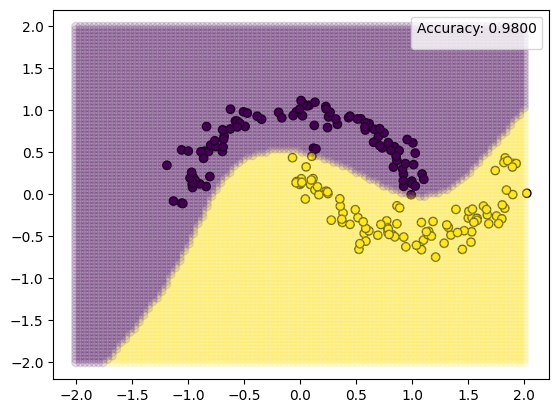

In [70]:
y_pred_class = y_predicted_cls.numpy()
fig, ax = plt.subplots()
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_class, edgecolors="black")
ax.scatter(xx, yy, c=probs_np.round(), alpha=0.125)
ax.plot()
ax.legend(title="Accuracy: {:.4f}".format(acc))
plt.show()

Now we get better training accuracy and a non-linear decision boundary.

## Extensions

- We could possibly run fewer iterations if a better optimzier is used.
- Could we use random features instead of fixed polynomial features?
- There is no validation and testing in this example.